In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
import seaborn as sns
from thesis import output_folder, big_fontsize, base_width, base_height, dpi

In [2]:
# plt.rcParams["font.family"] = "sans-serif"
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{romanbar}')

In [3]:
redshift = 1. + 1.838

In [4]:
#from avro

refmag = {
    "g": 17.7810001373291,
    "r": 17.33500099182129,
    "i": 16.777000427246094
}

In [5]:
fp = pd.read_csv("data/ZTF18aaqnqzx_SNT_5.0.csv", sep=",", index_col=0)
print(fp.columns)

Index(['sigma', 'sigma.err', 'ampl', 'ampl.err', 'fval', 'chi2', 'chi2dof',
       'filename', 'humidity', 'filter', 'obsmjd', 'ccdid', 'amp_id', 'gain',
       'readnoi', 'darkcur', 'magzp', 'magzpunc', 'magzprms', 'clrcoeff',
       'clrcounc', 'zpclrcov', 'zpmed', 'zpavg', 'zprmsall', 'clrmed',
       'clravg', 'clrrms', 'qid', 'rcid', 'seeing', 'maglim', 'status',
       'filterid', 'fieldid', 'moonalt', 'moonillf', 'target_x', 'target_y',
       'data_hasnan', 'F0', 'F0.err', 'Fratio', 'Fratio.err', 'upper_limit',
       'mag', 'mag_err'],
      dtype='object')


In [6]:
photometry = pd.read_csv("data/ZTF18aaqnqzx.csv", sep=",")
print(photometry)
det_mask = photometry["magpsf"] != 99.
obs = photometry[det_mask]
lim = photometry[~det_mask]

            date         jdobs filter  absmag  magpsf  sigmamagpsf  limmag  \
0    2018 Apr 21  2.458230e+06      r   99.00   99.00        99.00   20.41   
1    2018 Apr 21  2.458230e+06      r   99.00   99.00        99.00   20.41   
2    2018 Apr 24  2.458233e+06      r   99.00   99.00        99.00   19.89   
3    2018 Apr 24  2.458233e+06      r   99.00   99.00        99.00   19.89   
4    2018 May 05  2.458244e+06      r   99.00   99.00        99.00   20.21   
..           ...           ...    ...     ...     ...          ...     ...   
594  2021 Jun 29  2.459395e+06      g  -27.74   17.99         0.05   20.63   
595  2021 Jun 29  2.459395e+06      i  -28.85   16.88         0.06   19.88   
596  2021 Jun 29  2.459395e+06      r  -28.27   17.45         0.06   20.14   
597  2021 Jul 01  2.459397e+06      r  -28.28   17.45         0.08   20.62   
598  2021 Jul 01  2.459397e+06      g  -27.77   17.96         0.07   20.52   

    instrument  programid reducedby refsys  issub  isdiffpos  


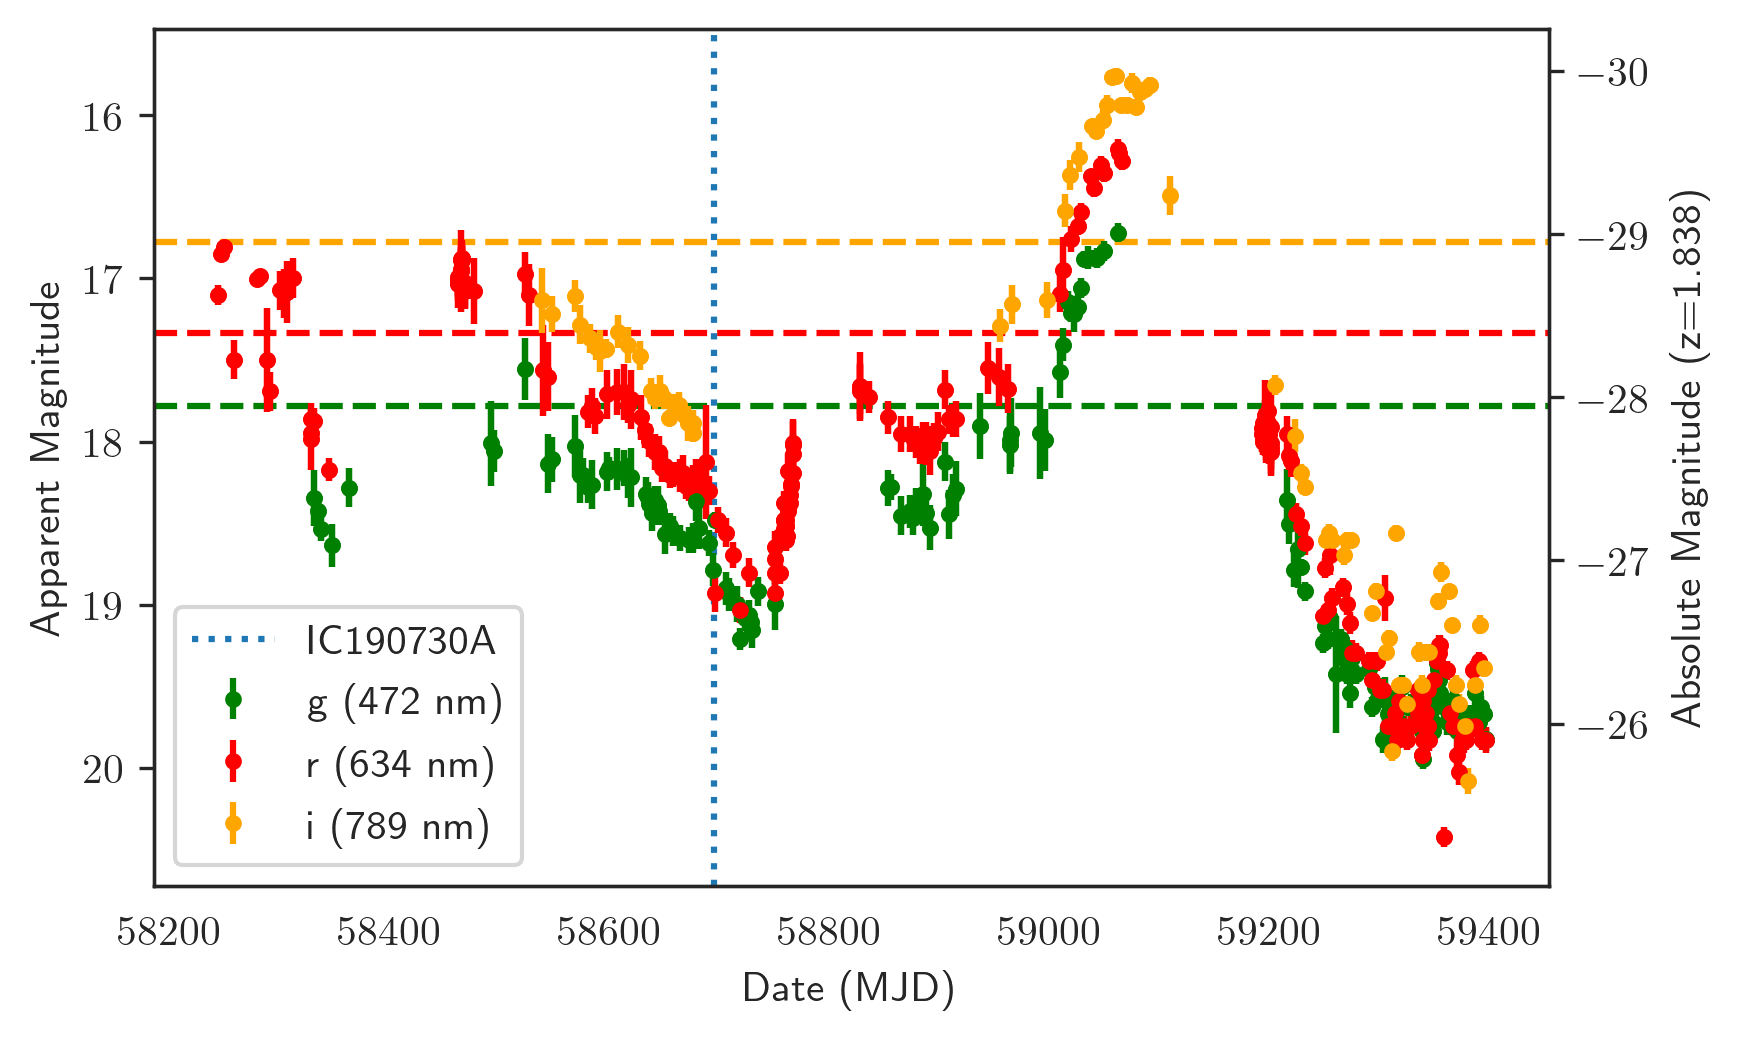

In [22]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)

ax = plt.subplot(111)
ax1b = ax.twinx()

cmap = {
    "g": "g",
    "r": "r",
    "i": "orange"
}

wl = {
    "g": 472.27,
    "r": 633.96,
    "i": 788.61,
}

markersize=3.

for f in ["g", "r", "i"]:
    
    mask = obs["filter"] == f
    
    if np.sum(mask) > 0:
    
        df = obs[mask]
    
        factor = (df["isdiffpos"])*2 - 1.

        mag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + factor * 10.**(-0.4*df["magpsf"]))

        mask = factor > 0.

        ax.errorbar(df["jdobs"]-2400000.5, mag, yerr=df["sigmamagpsf"], color=cmap[f[-1]], marker="o", linestyle=" ", label=f'{f[-1]} ({wl[f]:.0f} nm)', markersize=markersize)

        delta = np.mean(df["magpsf"] - df["absmag"])

        ax1b.errorbar(df["jdobs"]-2400000.5, mag - delta, color=cmap[f[-1]], yerr=df["sigmamagpsf"], marker="o", linestyle=" ", markersize=markersize)
        ax.axhline(refmag[f[-1]], color=cmap[f[-1]], linestyle="--")
    
#     ldf = lim[lim["filter"] == f]    
#     limmag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + 10.**(-0.4*ldf["limmag"]))
#     ax.errorbar(ldf["jdobs"]-2400000.5, limmag, color=cmap[f[-1]], linestyle=" ", uplims=True)
#     ax1b.errorbar(ldf["jdobs"]-2400000.5, limmag - delta, color=cmap[f[-1]], linestyle=" ", uplims=True, marker="v")
    
ax.invert_yaxis()
ax1b.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2019-07-30T20:50:41.31", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC190730A")

ax.legend(fontsize=big_fontsize)

filename = "pks1502_lightcurve.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")
plt.ylim()

plt.savefig(f"plots/{filename}")
plt.savefig(output_path)


# plt.yscale("log")